In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [41]:
train_data = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Twitter\twitter_training.csv")
val_data = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Twitter\twitter_validation.csv")
col = ['tweet_id', 'entity','sentiment','description']
train_data.columns = col
val_data.columns = col

In [42]:
train_data.head(4)

,tweet_id,entity,sentiment,description
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# **Data Cleaining**

In [43]:
train_data.isnull().sum()

tweet_id         0
entity           0
sentiment        0
description    686
dtype: int64

In [44]:
train_data.dropna(inplace=True)
val_data.dropna(inplace=True)

In [45]:
train_data.duplicated().sum()

np.int64(2340)

In [46]:
train_data.drop_duplicates(inplace=True)
val_data.drop_duplicates(inplace=True)

In [8]:
train_data.shape

(71655, 4)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     71655 non-null  int64 
 1   entity       71655 non-null  object
 2   sentiment    71655 non-null  object
 3   description  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [10]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     999 non-null    int64 
 1   entity       999 non-null    object
 2   sentiment    999 non-null    object
 3   description  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


# **EDA Exploratory Data Analysis** 

In [11]:
train_data['sentiment'].value_counts().reset_index()

,sentiment,count
0,Negative,21698
1,Positive,19712
2,Neutral,17708
3,Irrelevant,12537


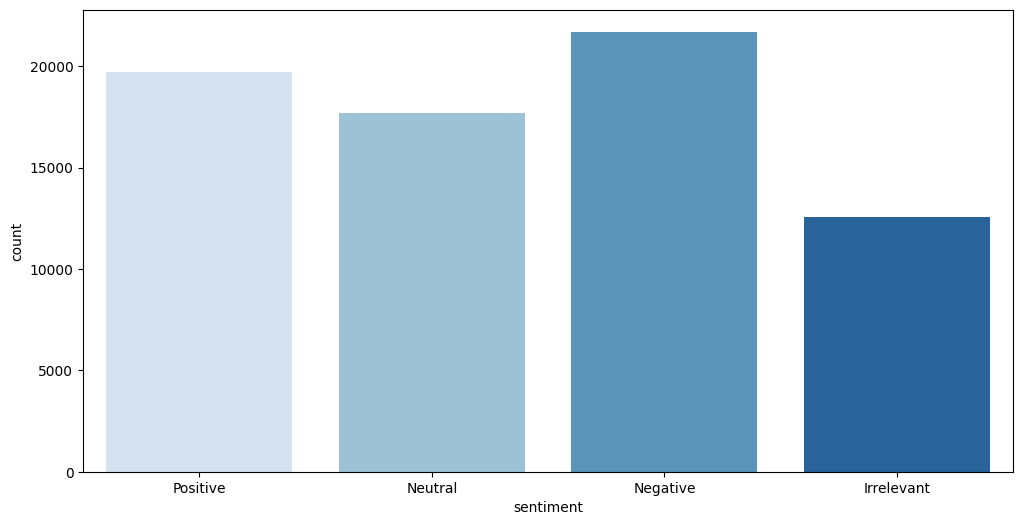

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_data, x='sentiment', palette='Blues')
plt.show()

In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\iamaf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
train_data['num_char'] = train_data['description'].apply(len)

In [15]:
train_data['num_word'] = train_data['description'].apply(lambda x : len(nltk.word_tokenize(x)))

In [16]:
train_data['num_sent'] = train_data['description'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [17]:
train_data.head(2)

,tweet_id,entity,sentiment,description,num_char,num_word,num_sent
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,13,1
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,11,1


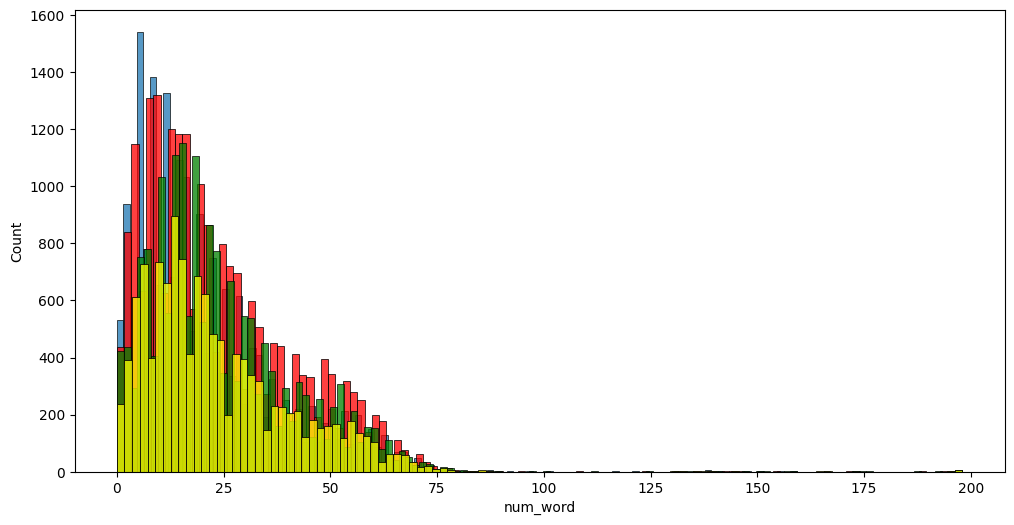

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['sentiment'] == 'Positive']['num_word'])
sns.histplot(train_data[train_data['sentiment'] == 'Negative']['num_word'], color='red')
sns.histplot(train_data[train_data['sentiment'] == 'Neutral']['num_word'], color='green')
sns.histplot(train_data[train_data['sentiment'] == 'Irrelevant']['num_word'], color='yellow')

plt.show()

# **Data Pre-Processing**

In [19]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [20]:
def transform_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove Special Character
    text = re.sub('[^a-zA-Z0-9]+', ' ', text)
    
    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Tokenization
    tokens = word_tokenize(text)

    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    cleaned_text = " ".join(tokens)
    return cleaned_text

In [21]:
text = train_data['description'][2000]
transform_text(text)

'congratul borderland research institut recent grant amount 80 000 pcqc bri dedic studi montezuma quail tran peco region order better understand popul densiti'

In [22]:
train_data['description'] = train_data['description'].apply(transform_text)

# **Word Cloud Technique**

In [23]:
from wordcloud import WordCloud

In [24]:
def draw_wordCloud(data):
    wc = WordCloud(width=450, height=450, min_font_size=10, background_color='white').generate(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.show()

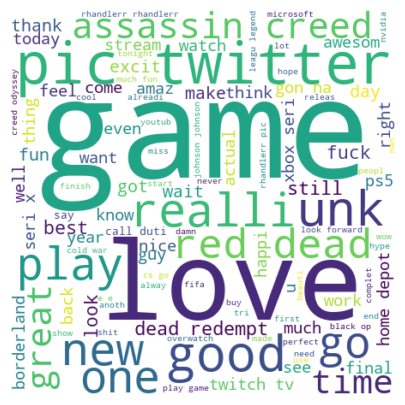

In [25]:
draw_wordCloud(train_data[train_data['sentiment'] == 'Positive']['description'].str.cat(sep=" "))

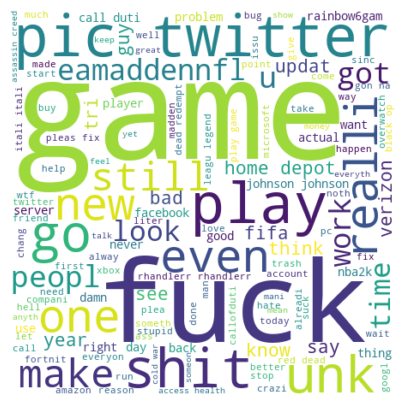

In [26]:
draw_wordCloud(train_data[train_data['sentiment'] == 'Negative']['description'].str.cat(sep=" "))

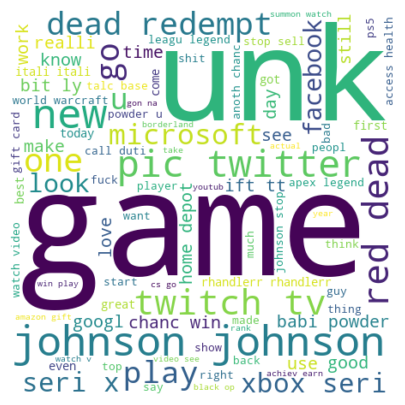

In [27]:
draw_wordCloud(train_data[train_data['sentiment'] == 'Neutral']['description'].str.cat(sep=" "))

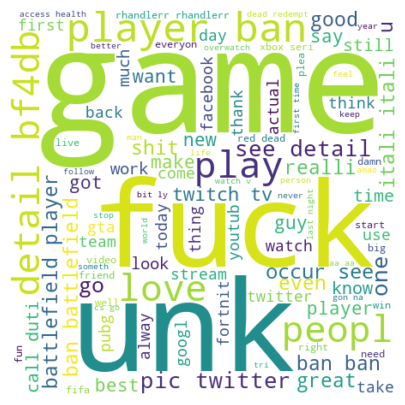

In [28]:
draw_wordCloud(train_data[train_data['sentiment'] == 'Irrelevant']['description'].str.cat(sep=" "))

# **Text Vectorization Technique**

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [34]:
tf = TfidfVectorizer()
x = tf.fit_transform(train_data['description'])

In [35]:
y = train_data['sentiment']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Model Building**

In [72]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [63]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)

    # Accuracy
    acc1 = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc1*100:.2f}")

    # Precision
    acc2 = precision_score(y_test, y_pred, average='weighted')
    print(f"Precision: {acc2*100:.2f}")

    # Recall
    acc3 = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall: {acc3*100:.2f}")

    # F1 Score
    acc4 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score: {acc4*100:.2f}")

    print()

In [56]:
lr = LogisticRegression()
lr.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [64]:
evaluate_model(lr, x_train, y_train)

Accuracy: 83.80
Precision: 84.06
Recall: 83.80
F1 Score: 83.78



In [70]:
mb = MultinomialNB()
mb.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [71]:
evaluate_model(mb, x_train, y_train)

Accuracy: 76.53
Precision: 79.68
Recall: 76.53
F1 Score: 76.09



In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

In [ ]:
evaluate_model(svc, x_train, y_train)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

In [ ]:
evaluate_model(dt, x_train, y_train)